In [ ]:
import pandas as pd
import numpy as np
scoring_function = [1877.612, 2030.918, 1912.785481, 1672.520841, 2050.989301, 2477.963,
                   1540.401395, 1433.541178, 1147.4, 999.5, 890.2, 957.3,1221.4] ## Metrics
training_time = [20.011164, 0.209155, 9.211304,37.020665,32.794138,0.029446,13.334237, 
                 1.267747,402,2625 ,262 , 1725,1051] ## SAVINGS OF A PROCESS
r2 = np.array([0.622, 0.553,0.586,0.609,0.530, 0.464,0.621,0.559,0.34, 0.61, 0.78,  0.67, 0.72])*10
r2 = r2.tolist()
approach = ['SVR', 'KNN', 'XGB', 'RF', 'Adaboost', 'SGD', 'ET', 'bagging', 'LSTM', 'GRU', 'CNN_1d',
           'CNN_2d', 'MLP']
dd_type = ['ML','ML','ML','ML','ML','ML','ML','ML','DL','DL','DL','DL','DL']

sf_vs_tt = pd.DataFrame({"Scoring Function": scoring_function, "Training Time" : training_time,
                         "Approach": approach, "R2":r2,"Type": dd_type})



In [ ]:
sf_vs_tt

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#sns.scatterplot(x="tt", y="sf", hue="time",data=sf_vs_tt_lf)
# Load the example iris dataset
#diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset

f, ax = plt.subplots(figsize=(11, 11))
ax = sns.scatterplot(x="Scoring Function",y="Training Time",hue="Approach",
                     data=sf_vs_tt,s=500)

In [ ]:
import matplotlib.pyplot as plt
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
plt.figure(figsize=(10,10))
svr = plt.scatter(1877.612, 20.011164, marker='o', color=colors[0])
knn = plt.scatter(2030.918, 0.209155, marker='o', color=colors[1])
xgb  = plt.scatter(1912.785481, 9.211304, marker='o', color=colors[2])
rf  = plt.scatter(1672.520841, 37.020665, marker='o', color=colors[3])
# dt  = plt.scatter(7.795658e+06, 0.399910, marker='o', color=colors[3])
adb = plt.scatter(2050.989301, 32.794138, marker='o', color=colors[4])
sgd = plt.scatter(2477.963,0.029446, marker='o', color=colors[5])
et = plt.scatter(1540.401395,13.334237, marker='o', color=colors[6])
bag = plt.scatter(1433.541178, 1.267747, marker='x', color=colors[7])

lstm = plt.scatter(1147.4, 402, marker='x', color=colors[1])
gru = plt.scatter(999.5,2625 , marker='x', color=colors[2])
cnn_1d = plt.scatter(890.2, 262 , marker='x', color=colors[3])
cnn_2d = plt.scatter(957.3, 1725, marker='x', color=colors[4])
cnn = plt.scatter(2552.214, 2743.92, marker='x', color=colors[5])
mlp = plt.scatter(1221.4, 1051, marker='x', color=colors[6])

plt.title('Scoring Function vs Training Time')
plt.ylabel('Time(s)')
plt.xlabel('Scoring Function')

plt.legend((svr, knn, xgb, rf, adb, sgd, et, bag, lstm, gru, cnn_1d, cnn_2d, cnn, mlp),
           ('SVR', 'KNN', 'XGB', 'RF', 'Adaboost', 'SGD', 'ET', 'bagging', 'LSTM', 'GRU', 'CNN_1d',
           'CNN_2d', 'CNN', 'MLP'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=8)

plt.show()

In [ ]:
def get_modelname(model):
    name = str(model).partition('(')[0]
    if name=='SVR':
        name = model.get_params()['kernel'] + name
    return(name)

In [ ]:
# def evalModels(models, Xw, y, boxPlotOn=True):
#     from sklearn.preprocessing import StandardScaler # Standardize data (0 mean, 1 stdev)
#     from sklearn.model_selection import KFold
#     from sklearn.model_selection import cross_val_score
#     from sklearn.pipeline import Pipeline, make_pipeline

#     scoring = 'neg_mean_absolute_error'  

#     modelnames = []
#     results = []
#     for model in models:
#         pipe = make_pipeline( StandardScaler(), model )
#         kfold = KFold(n_splits=10, shuffle=False)
#         cv_results = cross_val_score(pipe, Xw, y, cv=kfold, scoring=scoring)
#         modelname = get_modelname(model)
#         print("%s: %.3f %.3f" %(modelname, -1*cv_results.mean(), cv_results.std()))
#         modelnames.append(modelname)
#         results.append(-1*cv_results)

        
#     if boxPlotOn:
#         import matplotlib.pyplot as plt
#         # boxplot algorithm comparison
#         fig = plt.figure()
#         fig.suptitle('Algorithm Comparison')
#         ax = fig.add_subplot(111)
#         plt.boxplot(results, showmeans=True)
#         ax.set_xticklabels(modelnames, fontsize=9)
#         plt.xticks(rotation=90)
#         plt.show()
    
#     return(results, modelnames)

In [3]:
from sklearn import linear_model
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
def prepros(train_file, test_file, ground_file):
    # read training data - It is the aircraft engine run-to-failure data.
    train_df = pd.read_csv(train_file, sep=" ", header=None)

    #remove the columns 26 and 27 because of NAN values
    train_df=train_df.loc[:,0:25]

    train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                         's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                         's15', 's16', 's17', 's18', 's19', 's20', 's21']

    train_df = train_df.sort_values(['id','cycle'])

    # read test data - It is the aircraft engine operating data without failure events recorded.
    test_df = pd.read_csv(test_file, sep=" ", header=None)

    #remove the columns 26 and 27 because of NAN values
    test_df=test_df.loc[:,0:25]

    test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                         's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                         's15', 's16', 's17', 's18', 's19', 's20', 's21']

    test_df = test_df.sort_values(['id','cycle'])

    #read ground truth data - It contains the information of true remaining cycles for each engine in the testing data.
    truth_df = pd.read_csv(ground_file, sep=" ", header=None)

    #remove the columns 1 because of NAN values
    truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
    truth_df.columns = ['cycle']

    # Data Labeling - generate column RUL(Remaining Usefull Life or Time to Failure)
    ##TRAINING DATASET
    rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
    rul.columns = ['id', 'max']

    train_df = train_df.merge(rul, on=['id'], how='left')

    train_df['RUL'] = train_df['max'] - train_df['cycle']
    train_df.drop('max', axis=1, inplace=True)

    # generate label columns for training data
    # we will only make use of "label1" for binary classification, 
    # while trying to answer the question: is a specific engine going to fail within w1 cycles?
    w1 = 30
    w0 = 15
    train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )

    train_df['label2'] = train_df['label1']
    train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2

    #check columns with repeated values: setting3, s1, s5, s10, s16,s18,s19
    train_df.apply(lambda x: x.nunique())
    train_df.drop(train_df.columns[[4,5,9,14,20,22,23]], axis=1, inplace=True)

    #TEST DATASET
    test_df.drop(test_df.columns[[4,5,9,14,20,22,23]], axis=1, inplace=True)
    test_df.apply(lambda x: x.nunique())

    # We use the ground truth dataset to generate labels for the test data.
    # generate column max for test data
    rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()

    rul.columns = ['id', 'max']
    truth_df.columns = ['more']
    truth_df['id'] = truth_df.index + 1
    truth_df['max'] = rul['max'] + truth_df['more']
    truth_df.drop('more', axis=1, inplace=True)

    # generate RUL for test data
    test_df = test_df.merge(truth_df, on=['id'], how='left')
    test_df['RUL'] = test_df['max'] - test_df['cycle']
    test_df.drop('max', axis=1, inplace=True)

    # generate label columns w0 and w1 for test data
    test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
    test_df['label2'] = test_df['label1']
    test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2

    # MinMax normalization (from 0 to 1)
    min_max_scaler = preprocessing.MinMaxScaler()

    ###TRAIN#####
    train_df['cycle_norm'] = train_df['cycle']
    cols_normalize = train_df.columns.difference(['id','cycle','RUL','label1','label2'])
    norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                                 columns=cols_normalize, 
                                 index=train_df.index)

    join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
    train_df = join_df.reindex(columns = train_df.columns)

    ####TEST#####
    test_df['cycle_norm'] = test_df['cycle']
    test_df['id_norm'] = test_df['id']
    norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                                columns=cols_normalize, 
                                index=test_df.index)
    test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
    test_df = test_join_df.reindex(columns = test_df.columns)
    test_df = test_df.reset_index(drop=True)

    #### Generating input data
    # pick the feature columns 
    sequence_cols = train_df.columns.difference(['id','cycle','RUL','label1','label2'])

    # generate sequences and convert to numpy array
    X_train = train_df[sequence_cols]

    #obtain the last cycle data for each test battery
    test_df=test_df.loc[test_df.groupby('id').cycle.idxmax()]
    X_test = test_df[sequence_cols]
    # Generate labels
    y_train=train_df['RUL']
    y_test=test_df['RUL']
    return (X_train, y_train, X_test, y_test)

In [4]:
X_train_1, y_train_1, X_test_1, y_test_1 = prepros('train_FD001.txt', 'test_FD001.txt', 'RUL_FD001.txt')
# X_train_2, y_train_2, X_test_2, y_test_2 = prepros('train_FD002.txt', 'test_FD002.txt', 'RUL_FD002.txt')
# X_train_3, y_train_3, X_test_3, y_test_3 = prepros('train_FD003.txt', 'test_FD003.txt', 'RUL_FD003.txt')
# X_train_4, y_train_4, X_test_4, y_test_4 = prepros('train_FD004.txt', 'test_FD004.txt', 'RUL_FD004.txt')

In [7]:
def get_modelname(model):
    name = str(model).partition('(')[0]
    if name=='SVR':
        name = model.get_params()['kernel'] + name
    return(name)

In [ ]:
def scoring_function(true, pred, err_list):
        d = pred - true
        length = len(d)
        s = 0
        for i in range(length):
            if (d[i] < 0):
                s += np.exp((-d[i]/10))-1
            else:
                s += np.exp((d[i]/13))-1
        err_list.append(s)

In [ ]:
def rmse(true, pred, err_list):
    d_squared = (pred - true)**2
    err = np.mean(d_squared)
    err = np.sqrt(err)
    err_list.append(err)

In [ ]:
def mae(true, pred, err_list):
    d=abs(pred - true)
    err=np.mean(d)
    err_list.append(err)

In [ ]:
def ae(true, pred, err_list):
    d=abs(pred-true)
    err_list.append(d)

In [ ]:
def re(true, pred, err_list):
    d = (abs(pred-true)/true)
    err_list.append(d)

In [ ]:
def me(true, pred, err_list):
    d=(sum(abs(pred-true))/len(pred))
    err_list.append(d)

In [ ]:
def smape(true, pred, err_list):
    err = 100/len(true) * np.sum(2 * np.abs(pred - true) / (np.abs(true) + np.abs(pred)))
    err_list.append(err)

In [ ]:
def mad(true,pred, err_list):
    d1=(pred-true)
    m=np.median(d1)
    d2=np.abs(d1-m)
    err=np.sum(d2)/len(d1)
    err_list.append(err)

In [ ]:
def mdae(true,pred, err_list):
    d=np.abs(pred-true)
    err=np.median(d)
    err_list.append(err)

In [ ]:
def final_results(d):
    df = pd.DataFrame(data=d)
    df.set_index('Model', inplace=True)
    df.index.name='Model'
    print(df)
    #return df

In [32]:
%matplotlib inline
def evalModels(models, X_train, y_train, X_test, y_test, boxPlotOn=True):
    from sklearn.preprocessing import StandardScaler # Standardize data (0 mean, 1 stdev)
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.pipeline import Pipeline, make_pipeline
    from sklearn.metrics import r2_score
    import matplotlib.pyplot as plt
    import seaborn as sns

    scoring = 'neg_mean_absolute_error'  

    modelnames = []
    fitted_models = []
    results = []
    training_time = []
    testing_time = []
    predicted_value = []
    timeliness_value = []
    rmse_value = []
    mae_value = []
    smape_value = []
    r2_value = []
    ae_value = []
    re_value = []
    me_value = []
    mad_value = []
    mdae_value = []
    
    def scoring_function(true, pred):
        d = pred - true
        length = len(d)
        s = 0
        for i in range(length):
            if (d[i] < 0):
                s += np.exp((-d[i]/10))-1
            else:
                s += np.exp((d[i]/13))-1
        timeliness_value.append(s)
        
    def rmse(true, pred):
        d_squared = (pred - true)**2
        err = np.mean(d_squared)
        err = np.sqrt(err)
        rmse_value.append(err)
        
    def mae(true, pred):
        d=abs(pred - true)
        err=np.mean(d)
        mae_value.append(err)
        
    def ae(true, pred):
        d=abs(pred-true)
        err=np.sum(d)
        ae_value.append(err)
        
    def re(true, pred):
        d = (abs(pred-true)/true)
        err=np.sum(d)
        re_value.append(err)
        
    def me(true, pred):
        d=(sum(abs(pred-true))/len(pred))
        me_value.append(d)
        
    def smape(true, pred):
        err = 100/len(true) * np.sum(2 * np.abs(pred - true) / (np.abs(true) + np.abs(pred)))
        smape_value.append(err)
        
    def mad(true,pred):
        d1=(pred-true)
        m=np.median(d1)
        d2=np.abs(d1-m)
        err=np.sum(d2)/len(d1)
        mad_value.append(err)
        
    def mdae(true,pred):
        d=np.abs(pred-true)
        err=np.median(d)
        mdae_value.append(err)
        
    def final_results(d):
        df = pd.DataFrame(data=d)
        df.set_index('Model', inplace=True)
        df.index.name='Model'
        print(df)
    
    for model in models:
        pipe = make_pipeline( StandardScaler(), model )
        kfold = KFold(n_splits=10, shuffle=False)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring=scoring)
        modelname = get_modelname(model)
        print("%s: %.3f %.3f" %(modelname, -1*cv_results.mean(), cv_results.std()))
        modelnames.append(modelname)
        results.append(-1*cv_results)
        
    
    for model in models:
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        train_time = end - start
        fitted_models.append(model)
        training_time.append(train_time)
        
    
    for fittedmodels in fitted_models:
        start = time.time()
        y_pred = fittedmodels.predict(X_test)
        end = time.time()
        test_time = end - start
        testing_time.append(test_time)
        rmse(y_test.values, y_pred)
        scoring_function(y_test.values, y_pred)
        ae(y_test.values, y_pred)
        re(y_test.values, y_pred)
        me(y_test.values, y_pred)
        mae(y_test.values, y_pred)
        smape(y_test.values, y_pred)
        mad(y_test.values, y_pred)
        mdae(y_test.values, y_pred)
        r2_value.append(r2_score(y_test.values, y_pred))
        predicted_value.append(y_pred)

        
    if boxPlotOn:
        fig = plt.figure()
        palette = sns.color_palette("husl")
        sns.boxplot(data=results, palette=palette)
        sns.set(style="white",font_scale=1.13,rc={"font.weight": 'bold'})
        plt.xticks(plt.xticks()[0], modelnames)
        plt.xticks(rotation=90)
        plt.ylabel('Mean Absolute Error')
        fig.savefig('boxplot.png')
        
    data = {'Model':modelnames,
            'Scoring Function': timeliness_value,
            'RMSE': rmse_value,
            'AE': ae_value,
            'RE': re_value,
            'ME': me_value,
            'R^2':r2_value,
            'MAE':mae_value,
            'SMAPE':smape_value,
            'MAD':mad_value,
            'MdAE':mdae_value,
            'Training Time': training_time,
            'Testing Time': testing_time}
    final_results(data)
    return(results,
           timeliness_value,
           re_value,
           me_value,
           ae_value,
           rmse_value,
           mae_value,
           smape_value,
           r2_value,
           mad_value,
           mdae_value,
           modelnames)

SGDRegressor: 34.550 9.654


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    7.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 700 out of 700 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    7.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | ela

ExtraTreesRegressor: 26.497 8.427
AdaBoostRegressor: 28.550 7.533
BaggingRegressor: 28.816 8.322


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   14.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   14.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 conc

RandomForestRegressor: 26.425 8.436
rbfSVR: 27.448 9.954
XGBRegressor: 26.957 8.241
KNeighborsRegressor: 27.550 7.980


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   12.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s

                       Scoring Function       RMSE           AE         RE  \
Model                                                                        
SGDRegressor                2477.963462  30.402627  2520.219505  61.856006   
ExtraTreesRegressor         1599.851794  25.911946  1927.415028  31.950798   
AdaBoostRegressor           2016.879928  28.560149  2187.538782  42.607741   
BaggingRegressor            1409.964418  27.188363  2228.577500  48.840779   
RandomForestRegressor       1686.191407  25.871401  1907.284626  31.288368   
rbfSVR                      1877.611651  25.523428  1970.694642  36.584900   
XGBRegressor                1912.785481  26.727544  1944.877744  31.944656   
KNeighborsRegressor         2030.918125  27.756575  2073.151378  33.135246   

                              ME       R^2        MAE      SMAPE        MAD  \
Model                                                                         
SGDRegressor           25.202195  0.464743  25.202195  40.650

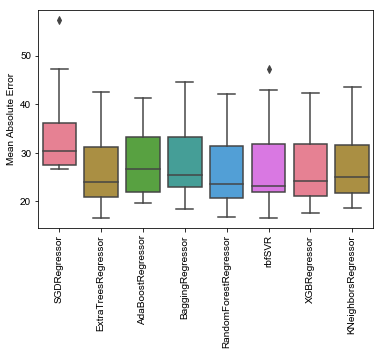

In [33]:
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
import xgboost as xgb
from sklearn import neighbors
import warnings
warnings.filterwarnings('ignore')
# create and evaluate pipeline
models = []
models.append( SGDRegressor(shuffle=False, max_iter=None, tol=None, alpha=1.0,
                            loss='squared_loss', penalty='l1') )
models.append( ExtraTreesRegressor(max_features='sqrt',
                                 min_samples_leaf=1,
                                 min_samples_split=10,
                                 n_estimators=700,
                                 verbose=1,
                                 n_jobs=-1))
models.append( AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                                 learning_rate=0.01,
                                 loss='exponential',
                                 n_estimators=400) )
models.append( BaggingRegressor(n_estimators=400,
                                bootstrap=True, 
                                max_features=18,
                                max_samples=30,
                                n_jobs=-1) )
models.append( RandomForestRegressor(max_features='sqrt',
                                     min_samples_leaf=4,
                                     min_samples_split=10,
                                     n_estimators=800,
                                     verbose=1,
                                     n_jobs=-1) )
models.append( svm.SVR(C=1,
                       epsilon=0.1,
                       kernel='rbf',
                       gamma='scale') )
models.append( xgb.XGBRegressor(objective="reg:linear",
                                n_estimators=500,
                                nthread=-1,
                                silent=False,
                                colsample_bytree=0.7,
                                gamma=0.5,
                                min_child_weight=1,
                                subsample=1.0,
                                n_jobs=-1) )
models.append( neighbors.KNeighborsRegressor(algorithm='auto', 
                                             n_neighbors=40,
                                             weights='distance',
                                             n_jobs=-1) )

results, timeliness,re,me,ae,rmse,mae,smape,r2,mad,mdae,modelnames = evalModels(models,X_train_1,y_train_1,X_test_1,y_test_1,boxPlotOn=True)

In [26]:
mae

[25.202195048866134, 21.793474999999994, 20.731513779610626]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure()
sns.boxplot(data=results)
plt.xticks(plt.xticks()[0], modelnames)
plt.xticks(rotation=90)
plt.ylabel('Mean Absolute Error')
fig.savefig('boxplot.png')

In [ ]:
%matplotlib inline
sns.boxplot(data=results)
plt.xticks(plt.xticks()[0], modelnames)
plt.xticks(rotation=90)

In [ ]:
ax.show()

In [ ]:
results_test = results[0:-2]

In [ ]:
results_test.append(np.array([18.01777016124075, 19.08547714234841, 18.61810288177123, 17.619403154163166, 17.469617410877248, 18.34671841387774, 17.442145677747924, 19.160146155970125, 18.430320567006447, 18.744002504926357]))

In [ ]:
results_test

In [ ]:
modelnames.append('CNN2D')

In [ ]:
modelnames

In [ ]:
results_test.append(np.array([20.998323330681167, 19.234475326514044, 18.502516721637832, 18.211856287639307, 16.800838330295846, 20.60939168987153, 20.9860453177409, 19.418558315224928, 18.131871812411365, 19.555813843401406]))
modelnames.append('CNN1D')

In [ ]:
results_test.append(np.array([18.661109434586884, 17.4749167644212, 16.328090963137054, 18.26126620806615, 16.439259683040785, 18.517395004384976, 17.763836526777567, 16.69404935545286, 16.896091157174286, 16.87094464406945]))
modelnames.append('CNN')

In [ ]:
results_test.append(np.array([19.174632851347162, 14.965517455312737, 24.815246362103796, 14.69731472868515, 15.458120581318491, 26.58457925028661, 17.42879313870755, 19.904137526577433, 15.207624142549776, 14.638524536351927]))
modelnames.append('LSTM')

In [ ]:
results_sig = [[28.65432678, 27.33126691, 32.05417722, 26.68404638, 27.20298043,
        34.19808939, 47.19218419, 28.04451459, 36.88454725, 57.25105967],
[22.91231799, 20.87124175, 24.88385949, 16.62592638, 17.30676079,
        27.38186206, 42.44519322, 21.06660697, 32.39765622, 39.0779806 ],
[25.93480661, 22.51155399, 27.13089021, 21.71908598, 19.72367763,
        30.67499452, 40.91537458, 21.51829287, 34.05657651, 41.19434126],
[25.35984617, 23.7318953 , 25.73767935, 18.88889724, 22.45273873,
        29.24297504, 44.59392753, 22.74959161, 34.69550291, 41.52428139],
[22.9676217 , 21.06257806, 24.23064445, 16.80321115, 16.97869103,
        27.55799536, 42.19653324, 20.72229717, 32.58228819, 39.20836571],
[24.28287418, 21.80293   , 22.19905195, 16.61266033, 17.25766192,
        26.27257479, 47.25850793, 22.18165508, 33.67434825, 42.93492414],
[23.85962672, 20.86479869, 24.39581339, 17.68919607, 18.09929648,
        27.95269707, 42.26654614, 21.65914963, 33.22886124, 39.55790887],
 [24.27781282, 21.74906995, 25.6492858 , 18.71238073, 19.49997929,
        28.18585657, 43.48910747, 22.01955238, 32.83176996, 39.08202969],
[18.01777016, 19.08547714, 18.61810288, 17.61940315, 17.46961741,
        18.34671841, 17.44214568, 19.16014616, 18.43032057, 18.7440025 ],
[20.998323330681167, 19.234475326514044, 18.502516721637832, 18.211856287639307, 16.800838330295846,
 20.60939168987153, 20.9860453177409, 19.418558315224928, 18.131871812411365, 19.555813843401406],
[18.661109434586884, 17.4749167644212, 16.328090963137054, 18.26126620806615, 16.439259683040785,
 18.517395004384976, 17.763836526777567, 16.69404935545286, 16.896091157174286, 16.87094464406945],
[19.174632851347162, 14.965517455312737, 24.815246362103796, 14.69731472868515, 15.458120581318491,
 26.58457925028661, 17.42879313870755, 19.904137526577433, 15.207624142549776, 14.638524536351927],
[14.253180583572306, 14.214632431174541, 15.24421802136218, 14.607750474139724, 13.983064409189407,
 14.489753037532221, 13.661561807233946, 15.069159143216966, 14.689767829931357, 14.152714450603238]]

modelnames = ['SGD',
 'ExtraTrees',
 'AdaBoost',
 'Bagging',
 'RandomForest',
 'SVR',
 'GradientBoosting',
 'KNN',
 'CNN2D',
 'CNN1D',
 'CNN',
 'LSTM',
 'GRU']

In [ ]:
results_sig = [[28.65432678, 27.33126691, 32.05417722, 26.68404638, 27.20298043,
        34.19808939, 47.19218419, 28.04451459, 36.88454725, 57.25105967],
[22.91231799, 20.87124175, 24.88385949, 16.62592638, 17.30676079,
        27.38186206, 42.44519322, 21.06660697, 32.39765622, 39.0779806 ],
[25.93480661, 22.51155399, 27.13089021, 21.71908598, 19.72367763,
        30.67499452, 40.91537458, 21.51829287, 34.05657651, 41.19434126],
[25.35984617, 23.7318953 , 25.73767935, 18.88889724, 22.45273873,
        29.24297504, 44.59392753, 22.74959161, 34.69550291, 41.52428139],
[22.9676217 , 21.06257806, 24.23064445, 16.80321115, 16.97869103,
        27.55799536, 42.19653324, 20.72229717, 32.58228819, 39.20836571],
[24.28287418, 21.80293   , 22.19905195, 16.61266033, 17.25766192,
        26.27257479, 47.25850793, 22.18165508, 33.67434825, 42.93492414],
[23.85962672, 20.86479869, 24.39581339, 17.68919607, 18.09929648,
        27.95269707, 42.26654614, 21.65914963, 33.22886124, 39.55790887],
 [24.27781282, 21.74906995, 25.6492858 , 18.71238073, 19.49997929,
        28.18585657, 43.48910747, 22.01955238, 32.83176996, 39.08202969],
[18.01777016, 19.08547714, 18.61810288, 17.61940315, 17.46961741,
        18.34671841, 17.44214568, 19.16014616, 18.43032057, 18.7440025 ],
[20.998323330681167, 19.234475326514044, 18.502516721637832, 18.211856287639307, 16.800838330295846,
 20.60939168987153, 20.9860453177409, 19.418558315224928, 18.131871812411365, 19.555813843401406],
[18.661109434586884, 17.4749167644212, 16.328090963137054, 18.26126620806615, 16.439259683040785,
 18.517395004384976, 17.763836526777567, 16.69404935545286, 16.896091157174286, 16.87094464406945],
[19.174632851347162, 14.965517455312737, 24.815246362103796, 14.69731472868515, 15.458120581318491,
 26.58457925028661, 17.42879313870755, 19.904137526577433, 15.207624142549776, 14.638524536351927],
[14.253180583572306, 14.214632431174541, 15.24421802136218, 14.607750474139724, 13.983064409189407,
 14.489753037532221, 13.661561807233946, 15.069159143216966, 14.689767829931357, 14.152714450603238]]

modelnames = ['SGD',
 'ExtraTrees',
 'AdaBoost',
 'Bagging',
 'RF',
 'SVR',
 'GBR',
 'KNN',
 'CNN2D',
 'CNN1D',
 'CNN',
 'LSTM',
 'GRU']

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
p = np.zeros((len(results_sig),len(results_sig)))
s = np.zeros((len(results_sig),len(results_sig)))

for i in range(len(results_sig)):
    for j in range(len(results_sig)):
        s[i][j], p[i][j] = mannwhitneyu(results_sig[i], results_sig[j])

        
s = np.around(s, decimals=5)
p = np.around(p, decimals=5)
from string import ascii_letters


sns.set(style="white",font_scale=1.13,rc={"lines.linewidth": 3.5, "font.weight": 'bold'})

# Generate a mask for the upper triangle
mask = np.zeros_like(p, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

model_inv = modelnames[::-1]

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(p*100, mask=mask,
            square=True, linewidths=.5,
            annot=True, cbar_kws=dict(shrink=0.5, use_gridspec=False,location="top",pad=0.0),
            annot_kws=dict(size=12),
            ax=ax, cmap='OrRd')
#cbar_kws={"shrink": 0.5}
plt.xticks(plt.xticks()[0], modelnames)
plt.yticks(plt.yticks()[0], modelnames)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
overfit_val_loss = [3031.7217674082367,
 2924.329375917949,
 2529.156398353663,
 2457.075932837938,
 2903.6382146952105,
 2230.677318815201,
 1928.446299728082,
 1994.0078922626383,
 2220.6305168783315,
 1676.6130244283179,
 1801.8468650117213,
 1922.9241259871155,
 1633.829518982072,
 1715.6588729806497,
 1634.930201228784,
 1782.76660640656,
 1652.0217194113873,
 1752.3951839568124,
 1768.2913672734821,
 1817.443348927833,
 2009.4655160374111,
 1873.0356189874835,
 1769.81899948185,
 2240.4773564457623,
 1820.0706298681073,
 2209.345026809342,
 2033.1465486652996,
 1921.4363754593055,
 1899.8828418573826,
 1972.224581357303,
 2358.5931931753007,
 2020.0059627026928,
 2319.431614374087,
 2267.0938544932947,
 1718.6965160013056,
 2066.163143975394,
 2273.4551649147693,
 2037.6107264019195,
 1904.3933727584458,
 2208.59751421524,
 1939.0497927438646,
 1957.672191446871,
 2219.176108365697,
 2082.099818543242,
 1976.6663236542354,
 2248.774754681014,
 2019.2041749759596,
 2153.85292485728,
 2262.051716893168,
 2471.1514413751443,
 2227.6516234642254,
 2235.7627665007194,
 2179.578035099436,
 2476.6357464087523,
 2241.5153351630215,
 2442.206079392206,
 2494.067430554604,
 2367.9417443783645,
 2313.3071518549846,
 2390.2178504667045,
 2546.9236205916286,
 2622.942600224294,
 3448.0582908405468,
 2636.9137494569463,
 2429.2870739355108,
 2674.043030970221,
 3006.8156724830333,
 2983.0378965780037,
 2688.577234873696,
 2609.518538888079,
 3061.8731124514625,
 2785.98852979353,
 2962.6271328136763,
 2439.2875856499013,
 2876.2468739810174,
 3362.6285262464667,
 2896.4771418495784,
 2992.5780754175858,
 2899.7267058149755,
 2694.272812261603,
 2866.649811448424,
 2821.8350234821,
 2969.1428545954004,
 3399.523882686416,
 3015.7862185350623,
 3166.9297749525836,
 2940.424503239915,
 3038.812027133241,
 3124.7072823626113,
 3137.3042251517713,
 2940.269537949508,
 3165.4724820368415,
 3023.844465952071,
 3112.7998968197917,
 3193.2929540448176,
 3295.7612485993745,
 3092.3861556928987,
 3166.823697520492,
 3183.712142377754,
 3105.19446992766]

overfit_loss = [2117.854875908492,
 1318.594980423667,
 1242.2128267009925,
 1223.8522811969467,
 1147.1509638561706,
 1103.7239519363166,
 1072.40451032687,
 1050.7910454059404,
 1008.9502477388027,
 1006.4736362591187,
 981.9634689799387,
 940.719219886461,
 947.4961189072396,
 897.4693248813933,
 895.0156377824935,
 860.535063699054,
 890.0899875655534,
 854.7538881744848,
 867.5033236021745,
 855.3406971651191,
 847.0040216809554,
 839.1765548197333,
 834.4820997738587,
 831.8846443778755,
 828.5163069766088,
 831.0652472071156,
 835.5238137584466,
 795.750401384913,
 796.1582904752444,
 808.1163971818537,
 788.8935312958831,
 787.8450201559497,
 788.0843459757002,
 788.2548550087495,
 829.7563299384753,
 780.7672449992947,
 778.7846778046921,
 770.6499253468529,
 807.2972669759515,
 782.1444923062852,
 778.896525807512,
 773.1118810957454,
 738.4298138401192,
 756.3484916915407,
 729.5380932384849,
 736.7773662030287,
 744.1571496405853,
 720.4840751364738,
 726.4776419340689,
 705.5301465434599,
 705.4494199694507,
 690.8033095910538,
 672.7098932706799,
 694.9502425650278,
 706.7397712817631,
 666.8579170456409,
 677.7280229277698,
 650.6826516306077,
 632.5243918864317,
 667.3959013559706,
 666.7098953324966,
 620.7452211822973,
 614.494432064313,
 631.6037904793834,
 625.8404595599911,
 630.3150801211154,
 596.4697085331449,
 581.6061258617162,
 574.7508498127102,
 575.2277907176002,
 576.5832696401262,
 573.7285713036645,
 540.4749221787333,
 594.2843494796344,
 531.4948174355274,
 534.8225302568507,
 511.78813137439835,
 525.400460178613,
 515.8699818654,
 518.6337601855278,
 514.9518282577718,
 515.6517586864641,
 512.1800023963233,
 489.89661498781095,
 508.75588046053656,
 482.40475688512873,
 460.3336007174783,
 457.1335752432728,
 474.649447455466,
 466.7470601649773,
 450.12463765689193,
 448.7378544251169,
 441.0108043458847,
 443.4844607538752,
 424.4346864704765,
 433.9024677821156,
 418.8324143843742,
 442.00669943062474,
 411.06947403689776,
 408.27150801857397]

normal_val_loss = [2638.592434076495,
 2872.791335938469,
 2576.4507605451035,
 2625.184218183937,
 3042.2874636574397,
 2442.5371465488356,
 2522.1581174024377,
 2681.4429111653717,
 2877.437149636059,
 1982.682385399228,
 3060.2699389295512,
 2795.375446181178,
 3158.119543495092,
 2743.863231131279,
 2974.575469624699,
 2709.1055830784667,
 2431.0303830084076,
 2262.3382767830844,
 2578.5001589803196,
 2754.7460016004084,
 3136.859801874139,
 2092.9638773773263,
 3088.8971823521483,
 3096.4523758228675,
 2697.2636127255673,
 2820.7369060386604,
 2716.984460869614,
 2504.8531265604793,
 2244.073823440102,
 2335.029008662079,
 3083.178676458173,
 2683.7842058627243,
 3116.9801504087554,
 2665.9886563186474,
 2991.282171902473,
 2598.231815995543,
 2553.607684250051,
 2494.7713689133693,
 2148.32272644216,
 2695.826736086891,
 3214.99888620355,
 3069.9916465655474,
 3046.0417006442876,
 2770.57907898572,
 2790.1888633260924,
 2907.615921297311,
 3123.0926930953046,
 2668.556151392238,
 3224.2357899845324,
 3338.3759276720943,
 2511.3504787972724,
 2254.5436211583838,
 2667.3054845554757,
 2544.772331237793,
 3506.1539164605865,
 2524.099858030981,
 2888.4855573139494,
 2311.832234475618,
 3083.284755680837,
 2145.8216943373213,
 2371.269276685996,
 2305.823315955614,
 2747.6176979168745,
 2544.333734698306,
 2816.2784413880504,
 2188.012582220999,
 2524.493170653882,
 2889.3734792419573,
 2396.0392248452117,
 2616.818992286042,
 2648.8355990559066,
 2514.9047139053173,
 2893.865869863774,
 2907.057890712539,
 2731.25567453951,
 2524.621893417808,
 2140.6801705738853,
 2505.2862458348004,
 2396.5942409022323,
 2580.6899403855373,
 2239.7707187367137,
 2548.967884963332,
 2545.521503336035,
 3018.5936791902227,
 3127.8285597370864,
 2643.5994356462475,
 2723.715581033235,
 2944.354026431129,
 2729.128236454901,
 2474.6189677785583,
 2879.9978223874186,
 2892.010249935851,
 2872.3816638263174,
 2785.5337157390013,
 2812.6046111178234,
 2594.704290480841,
 2595.821296838946,
 2746.867856170585,
 2747.966006151403,
 2771.721996956131]

normal_loss = [2589.9523749526707,
 1357.6303935121587,
 1295.7775770276212,
 1263.5625174408142,
 1223.2883251236105,
 1185.4622356366472,
 1144.3526121338953,
 1117.6809310215876,
 1094.793273575734,
 1062.1133095615114,
 1050.5481429479596,
 1031.60639882546,
 1025.5080043758826,
 998.800037426587,
 980.7274081525336,
 973.193023883591,
 986.3515402046849,
 966.5710233497343,
 971.2183342593044,
 958.2290499547693,
 954.4207491327445,
 941.1572293782644,
 946.586421796097,
 950.9569667989983,
 937.7930805689297,
 938.9171452619947,
 925.8643353383422,
 921.8691014427916,
 919.5663294934923,
 917.376164232046,
 914.4926228241064,
 896.6952513956037,
 906.2257368193913,
 895.5873120431075,
 894.234665496878,
 888.9109127443529,
 899.2524265350132,
 876.7222555882615,
 885.1137196976048,
 889.7987210259378,
 875.8393855728108,
 881.5041409701234,
 867.3140119116375,
 870.8339095879887,
 855.6559508019482,
 864.8111066582028,
 841.153224999643,
 838.9718882079355,
 823.4259683637017,
 819.1815524515677,
 802.833929607997,
 789.152630134785,
 776.8046310731577,
 789.2295117439842,
 771.0726751148524,
 750.0201712594093,
 760.453717503001,
 749.8950163038916,
 734.3403366395639,
 733.0620164655442,
 708.5132822916789,
 720.9310152598738,
 707.4754399870432,
 709.2067429880387,
 695.5209502106377,
 708.4961062939998,
 684.8256047408056,
 672.8181892982118,
 677.9770122837493,
 673.9493581149532,
 655.5554489450208,
 649.7897549357119,
 651.4393991638749,
 650.3464324618435,
 633.510986093478,
 631.3506648943045,
 616.1067069093259,
 629.2077481255471,
 619.4336482496593,
 606.3929168322275,
 603.2005095875855,
 583.479366809049,
 587.8350927398945,
 591.6567520831118,
 589.8380269087683,
 566.2965028113331,
 558.5184320825,
 554.8317355562671,
 548.3461182117612,
 545.3387662161874,
 537.7250181609113,
 542.8820531918059,
 534.5345085222419,
 531.1407003428554,
 526.56610185894,
 525.9916142996027,
 519.320765918855,
 507.53622640974095,
 508.82544293051717,
 519.6103655797755]

%matplotlib inline

df_normal = pd.DataFrame({'Loss':normal_loss,'Overfit Loss':overfit_loss,
                          'Validation Loss': normal_val_loss, 'Overfit Validation Loss': overfit_val_loss})
df_normal = df_normal.rolling(10).sum()
df_overfit = pd.DataFrame({'Loss':overfit_loss, 'Validation Loss': overfit_val_loss})

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))
sns.set(style="white",font_scale=1.44,rc={"lines.linewidth": 3.5, "font.weight": 'bold'})
palette = sns.color_palette("husl", 4)
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax = sns.lineplot(data=df_normal, palette=palette)
#ax = sns.lineplot(data=df_normal)

